In [5]:
import os
from skimage import io
from skimage.util import random_noise
from skimage import filters
import numpy as np
import pickle
import networkx as nx
from keras.callbacks import ModelCheckpoint, EarlyStopping

C:\Users\remra\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [34]:
images = []
nlabels = []
elabels = []
gt = pickle.load( open( "../synimage/groundtruth/save.p", "rb" ))
for filename in sorted(os.listdir('../synimage/original')):
    if filename.endswith(".bmp"):
        image = io.imread(os.path.join('../synimage/original', filename))
        image = random_noise(image, mode='gaussian', clip=True)
        
        root, ext = os.path.splitext(filename)
        name = os.path.join('../synimage/noise/', root+'.png')
        io.imsave(fname=name ,arr=image)
        
        gtseg = gt[filename]
        nlabel = np.ones((image.shape[0], image.shape[1]), np.float32)
        for pos, z in gtseg.items():
            nlabel[pos] = z
        nlabel = np.expand_dims(nlabel, axis=2)
        elabel = np.ones((image.shape[0], image.shape[1], 2), np.float32)
        G = nx.grid_2d_graph(image.shape[0], image.shape[1])
        for (u,v,d) in G.edges(data = True):
            if u[0] == v[0]:
                channel = 0
            else:
                channel = 1
            if gtseg[u] != gtseg[v]:
                elabel[u[0], u[1], channel] = -1.0
        images.append(image)
        nlabels.append(nlabel)
        elabels.append(elabel)

C:\Users\remra\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


In [35]:
print(np.array(images).shape)
print(np.array(nlabels).shape)
print(np.array(elabels).shape)

(100, 100, 100, 3)
(100, 100, 100, 1)
(100, 100, 100, 2)


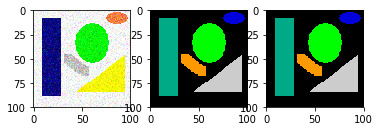

In [8]:
from data import test_sample
test_sample(images[0], nlabels[0], elabels[0])

In [36]:
f = open('../synimage/train.p', 'wb')
pickle.dump([images[::2], nlabels[::2], elabels[::2]], f, protocol=pickle.HIGHEST_PROTOCOL)
f.close()

In [37]:
f = open('../synimage/test.p', 'wb')
pickle.dump([images[1::2], nlabels[1::2], elabels[1::2]], f, protocol=pickle.HIGHEST_PROTOCOL)
f.close()

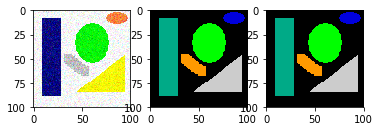

In [38]:
f = open('../synimage/train.p', 'rb')
train = pickle.load(f)
f.close()
test_sample(train[0][0], train[1][0], train[2][0])

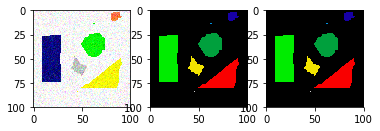

In [39]:
f = open('../synimage/test.p', 'rb')
test = pickle.load(f)
f.close()
test_sample(test[0][0], test[1][0], test[2][0])

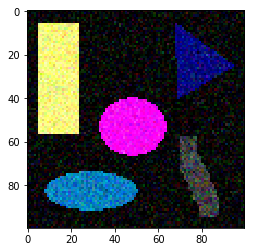

In [46]:
import matplotlib.pyplot as plt
plt.imshow(images[8])

In [20]:
import pandas as pd
training_log = pd.read_csv('C:/model/02-09-no-inference-training.log')

C:\Users\remra\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


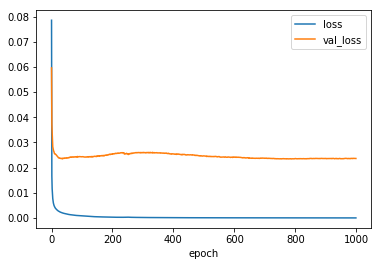

In [26]:
training_log.plot(x='epoch', y =['loss', 'val_loss'])

In [30]:
import val

In [32]:
val.test(USE_CC_INFERENCE = False)

USE_CC_INFERENCE: NO
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_image (InputLayer)        (None, 100, 100, 3)  0                                            
__________________________________________________________________________________________________
lambda_5 (Lambda)               (None, 100, 100, 6)  0           input_image[0][0]                
__________________________________________________________________________________________________
conv2d_23 (Conv2D)              (None, 100, 100, 64) 3520        lambda_5[0][0]                   
__________________________________________________________________________________________________
batch_normalization_25 (BatchNo (None, 100, 100, 64) 256         conv2d_23[0][0]                  
________________________________________________________________________________________

ValueError: You are trying to load a weight file containing 45 layers into a model with 25 layers.

In [4]:
from test_linear import *

C:\Users\qnguyen5\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Training set
(1, 1104, 75)
(1, 24, 24, 1)
Testing set
(1, 1104, 75)
(1, 24, 24, 1)
## Model 
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1104, 75)          0         
_________________________________________________________________
locally_connected1d (Locally (None, 1104, 1)           83904     
Total params: 83,904
Trainable params: 83,904
Non-trainable params: 0
_________________________________________________________________
Epoch: 5,   Loss: 0.5644041299819946    Err: 0.3136292270531401     Val Loss: 0.7749395370483398    Val Err: 0.5695471014492753
Epoch: 10,   Loss: 0.7089056968688965    Err: 0.21984903381642512     Val Loss: 0.7802724242210388    Val Err: 0.531322463768116
Epoch: 15,   Loss: 0.5500993728637695    Err: 0.14753019323671498     Val Loss: 0.8931307196617126    Val Err: 0.4592753623188406
Epoch: 20,   Loss: 0.6950399279594421    Err: 0.150609

KeyboardInterrupt: 

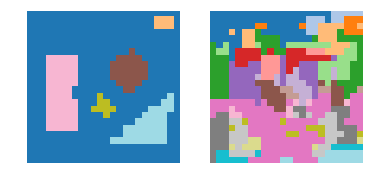

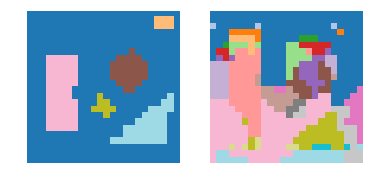

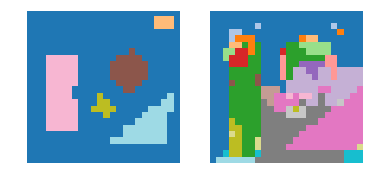

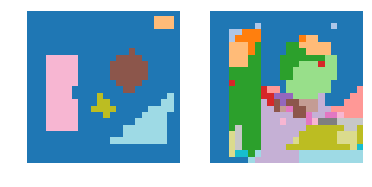

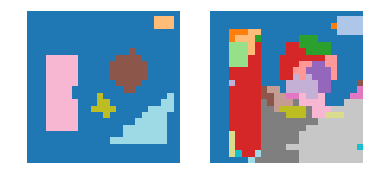

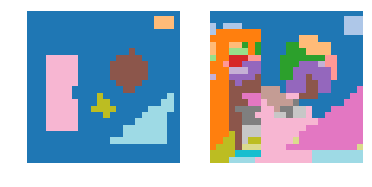

In [5]:
runExp()